In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [154]:
df = pd.read_csv('source/FReDA4.csv')

In [155]:
traits = [
    "Age",
    "Sex",
    "Work Status",
    "Neuroticism",
    "Extraversion",
    "Openness",
    "Agreeableness",
    "Conscientiousness",
    "Depressiveness",
    "Loneliness",
    "Self-esteem",
    "Life Satisfaction",
    "Health",
    "Communication Quality",
    "Relationship Satisfaction",
    "Conflict Management",
    "Relationship Length",
    "Married",
    "Cohabitation",
    "Kids"
]

traits.sort()

In [156]:
df_couple = df.melt(
    id_vars=["Group1", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group1"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

In [157]:
df_couple = df_couple.sort_values(by='Trait', ascending=True)

In [158]:
group_labels = [
    'I am okay and my partner is okay', 'I am deprived and my partner is okay',
    'I am deprived and my partner is deprived', 'I am deprived and my partner is saturated',
    'I am saturated and my partner is okay', 'I am saturated and my partner is saturated',
    'I am okay and my partner is deprived', 'I am okay and my partner is saturated'
]

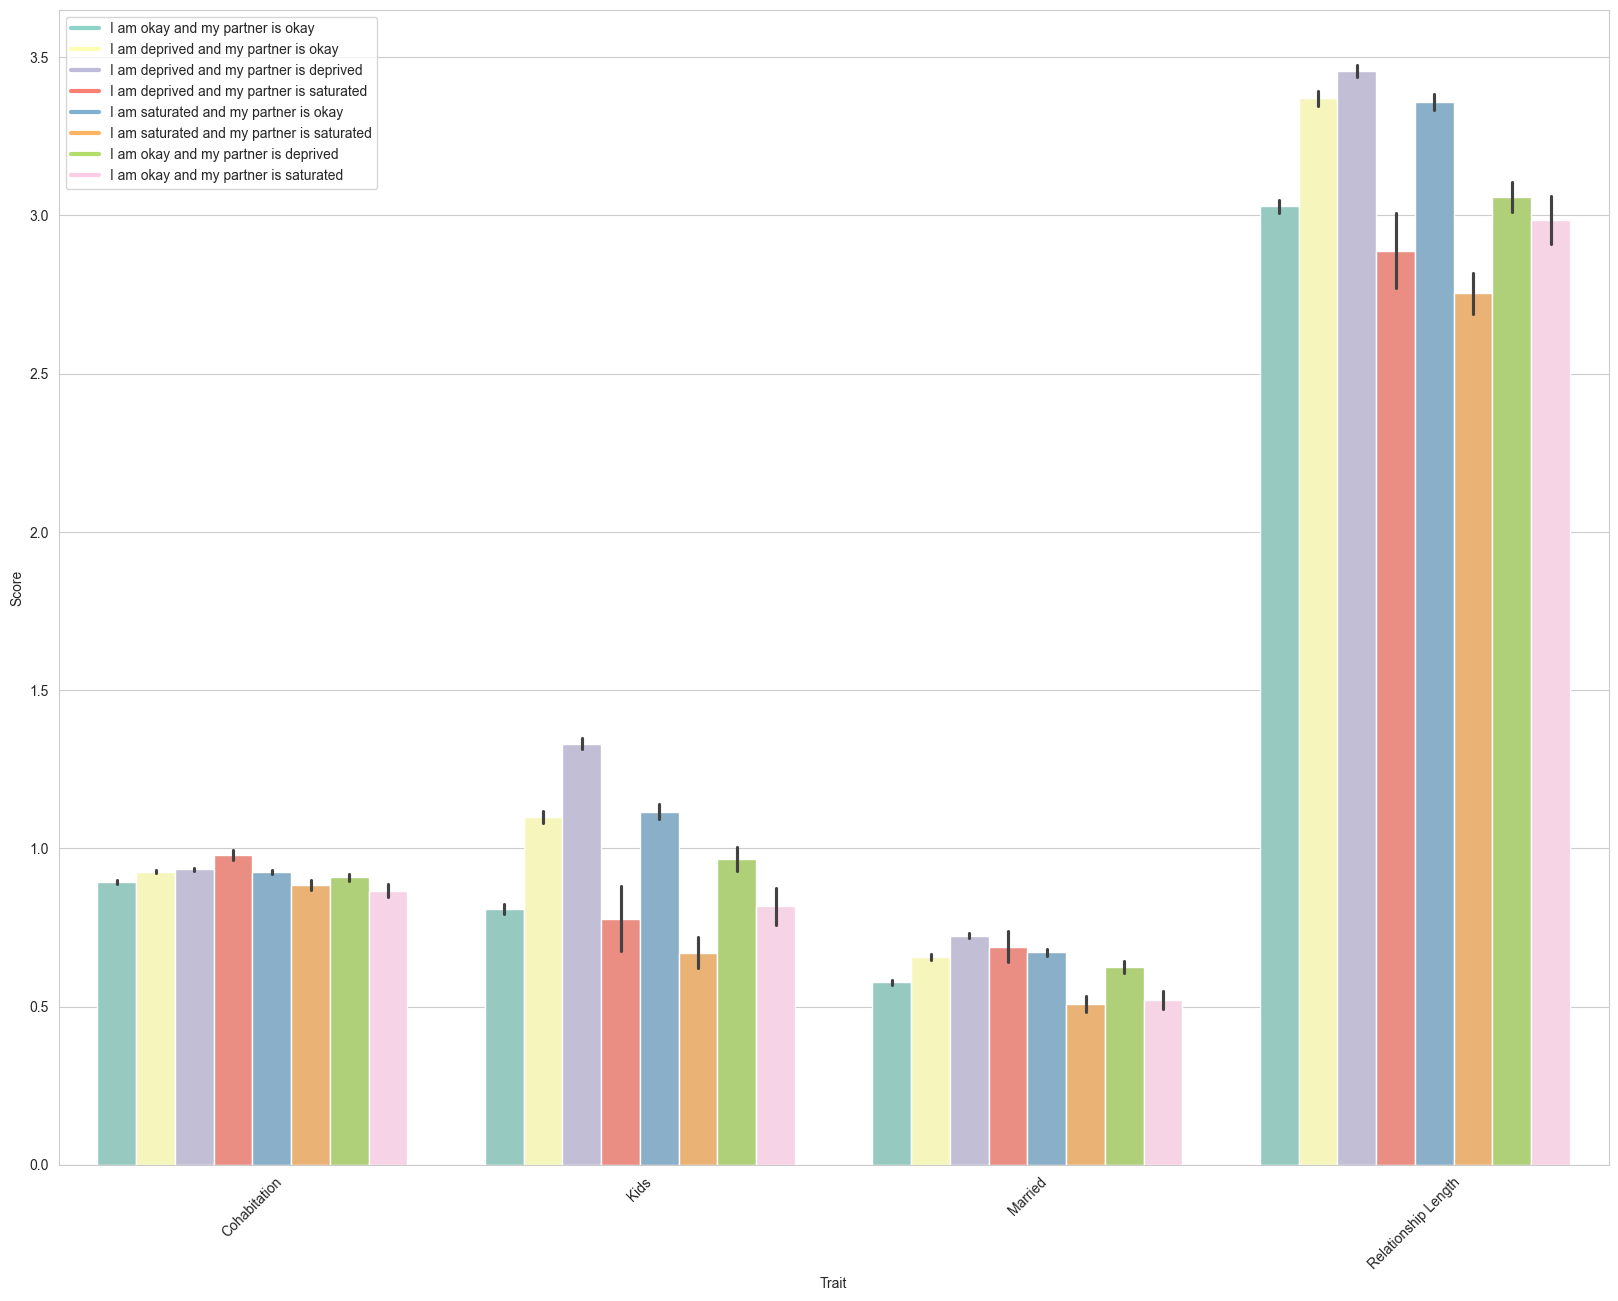

In [159]:
from statannotations.Annotator import Annotator
from scipy.stats import rankdata

# pairs = [
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup2")),
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup3")),
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup4")),
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup5")),
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup6")),
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup7")),
#     (("Loneliness", "SubGroup1"), ("Loneliness", "SubGroup8")),
# ]

plt.figure(figsize=(20, 15))
colors = sns.color_palette('Set3', 8)
ax = sns.barplot(data=df_couple, x="Trait", y="Score",
                 hue="Group1", palette=colors, errorbar="se",
                 )

# annot = Annotator(
#     ax, pairs, data=df_couple, x="Trait",
#     y="Score", hue="Group1",
# )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

# annot.apply_test()
# annot.annotate()

plt.xticks(rotation=45)
handles = [
    plt.Line2D([0], [0], color=colors[i], lw=3, label=group_labels[i])
    for i in range(len(group_labels))
]
plt.legend(handles=handles, labels=group_labels)
# plt.savefig('output/img_bg/alles/relationship.png', dpi=600, transparent=False, bbox_inches='tight')

In [160]:
results = []
for trait in traits:
    pairs = [
        ((trait, "SubGroup1"), (trait, "SubGroup2")),
        ((trait, "SubGroup1"), (trait, "SubGroup3")),
        ((trait, "SubGroup1"), (trait, "SubGroup4")),
        ((trait, "SubGroup1"), (trait, "SubGroup5")),
        ((trait, "SubGroup1"), (trait, "SubGroup6")),
        ((trait, "SubGroup1"), (trait, "SubGroup7")),
        ((trait, "SubGroup1"), (trait, "SubGroup8")),
    ]
    for (trait1, group1), (trait2, group2) in pairs:
        scores1 = df_couple[(df_couple["Trait"] == trait1) &
                            (df_couple["Group1"] == group1)]["Score"].dropna()
        scores2 = df_couple[(df_couple["Trait"] == trait2) &
                            (df_couple["Group1"] == group2)]["Score"].dropna()

        u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

        n1, n2 = len(scores1), len(scores2)
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z = (u_stat - mean_u) / std_u
        r = z / np.sqrt(n1 + n2)

        results.append({
            "Trait": trait1,
            "Control": group1,
            "Experiment": group2,
            "U": u_stat,
            "p-value": p_val,
            "r": r
        })

    df_couple_results = pd.DataFrame(results)

In [161]:
# 1. Dummy code data in terms of significance (ns= 0.5, *=1, **=1.5, and ***= 2.0)
def val_to_category(val):
    if val < 0.001:
        return 4
    elif val < 0.01:
        return 3
    elif val < 0.5:
        return 2
    else:
        return 1


def sig_to_category(val):
    if val < 0.001:
        return '***'
    elif val < 0.01:
        return '**'
    elif val < 0.5:
        return '*'
    else:
        return 'ns'


# df_couple_results['significance'] = df_couple_results['p-value'].apply(val_to_category)
df_couple_results['summary'] = df_couple_results['p-value'].apply(sig_to_category)

In [162]:
# import matplotlib.pyplot as plt
#
# # colors = sns.color_palette(palette='Spectral')
# colors = sns.color_palette(palette='Set3')
# N = len(traits)

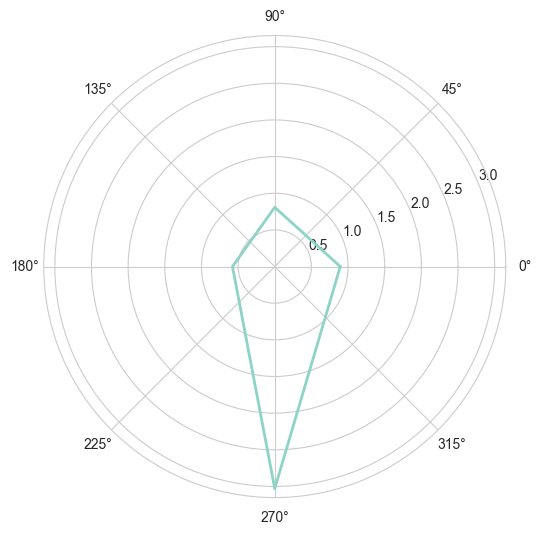

In [163]:
# angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
# angles += angles[:1]
#
# values1 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup1']["mean"]
# values2 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup2']["mean"]
# values3 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup3']["mean"]
# values4 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup4']["mean"]
# values5 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup5']["mean"]
# values6 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup6']["mean"]
# values7 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup7']["mean"]
# values8 = df_couple_summ[df_couple_summ['Group1'] == 'SubGroup8']["mean"]
#
# values1 = np.concatenate((values1, [values1.iloc[0]]))
# values2 = np.concatenate((values2, [values2.iloc[0]]))
# values3 = np.concatenate((values3, [values3.iloc[0]]))
# values4 = np.concatenate((values4, [values4.iloc[0]]))
# values5 = np.concatenate((values5, [values5.iloc[0]]))
# values6 = np.concatenate((values6, [values6.iloc[0]]))
# values7 = np.concatenate((values7, [values7.iloc[0]]))
# values8 = np.concatenate((values8, [values8.iloc[0]]))
#
# fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
#
# ax.plot(angles, values1, linewidth=2, linestyle='solid',
#         label='I am okay and my partner is okay', color=colors[0])
#
# ax.plot(angles, values2, linewidth=2, linestyle='solid',
#         label='I am deprived and my partner is okay', color=colors[1])
#
# ax.plot(angles, values3, linewidth=2, linestyle='solid',
#         label='I am deprived and my partner is deprived', color=colors[2])
#
# ax.plot(angles, values4, linewidth=2, linestyle='solid',
#         label='I am deprived and my partner is saturated', color=colors[3])
#
# ax.plot(angles, values5, linewidth=2, linestyle='solid',
#         label='I am saturated and my partner is okay', color=colors[4])
#
# ax.plot(angles, values6, linewidth=2, linestyle='solid',
#         label='I am saturated and my partner is saturated', color=colors[5])
#
# ax.plot(angles, values7, linewidth=2, linestyle='solid',
#         label='I am okay and my partner is deprived', color=colors[6])
#
# ax.plot(angles, values8, linewidth=2, linestyle='solid',
#         label='I am okay and my partner is saturated', color=colors[7])
#
# # Set labels
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(traits, fontsize=12)
# ax.tick_params(axis='x', pad=15)
#
# plt.legend(loc='upper right', bbox_to_anchor=(2, 1.1))
# # plt.show()
# # plt.savefig('output/img_bg/alles/spider_test.png', dpi=350, transparent=False, bbox_inches='tight')

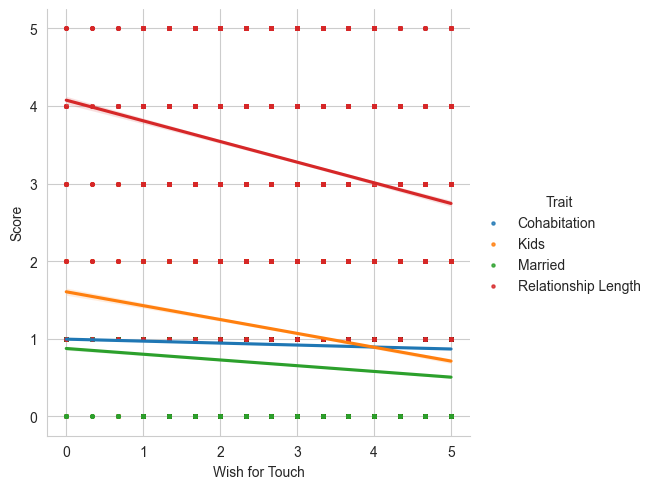

In [164]:
# data = df_couple[df_couple['Group1'] == 'SubGroup1']
# sns.lmplot(data=df_couple,
#            x="Wish for Touch",
#            y="Score",
#            hue="Trait",
#            scatter_kws={"s": 5},
#            )
# # plt.ylim([7, 9])

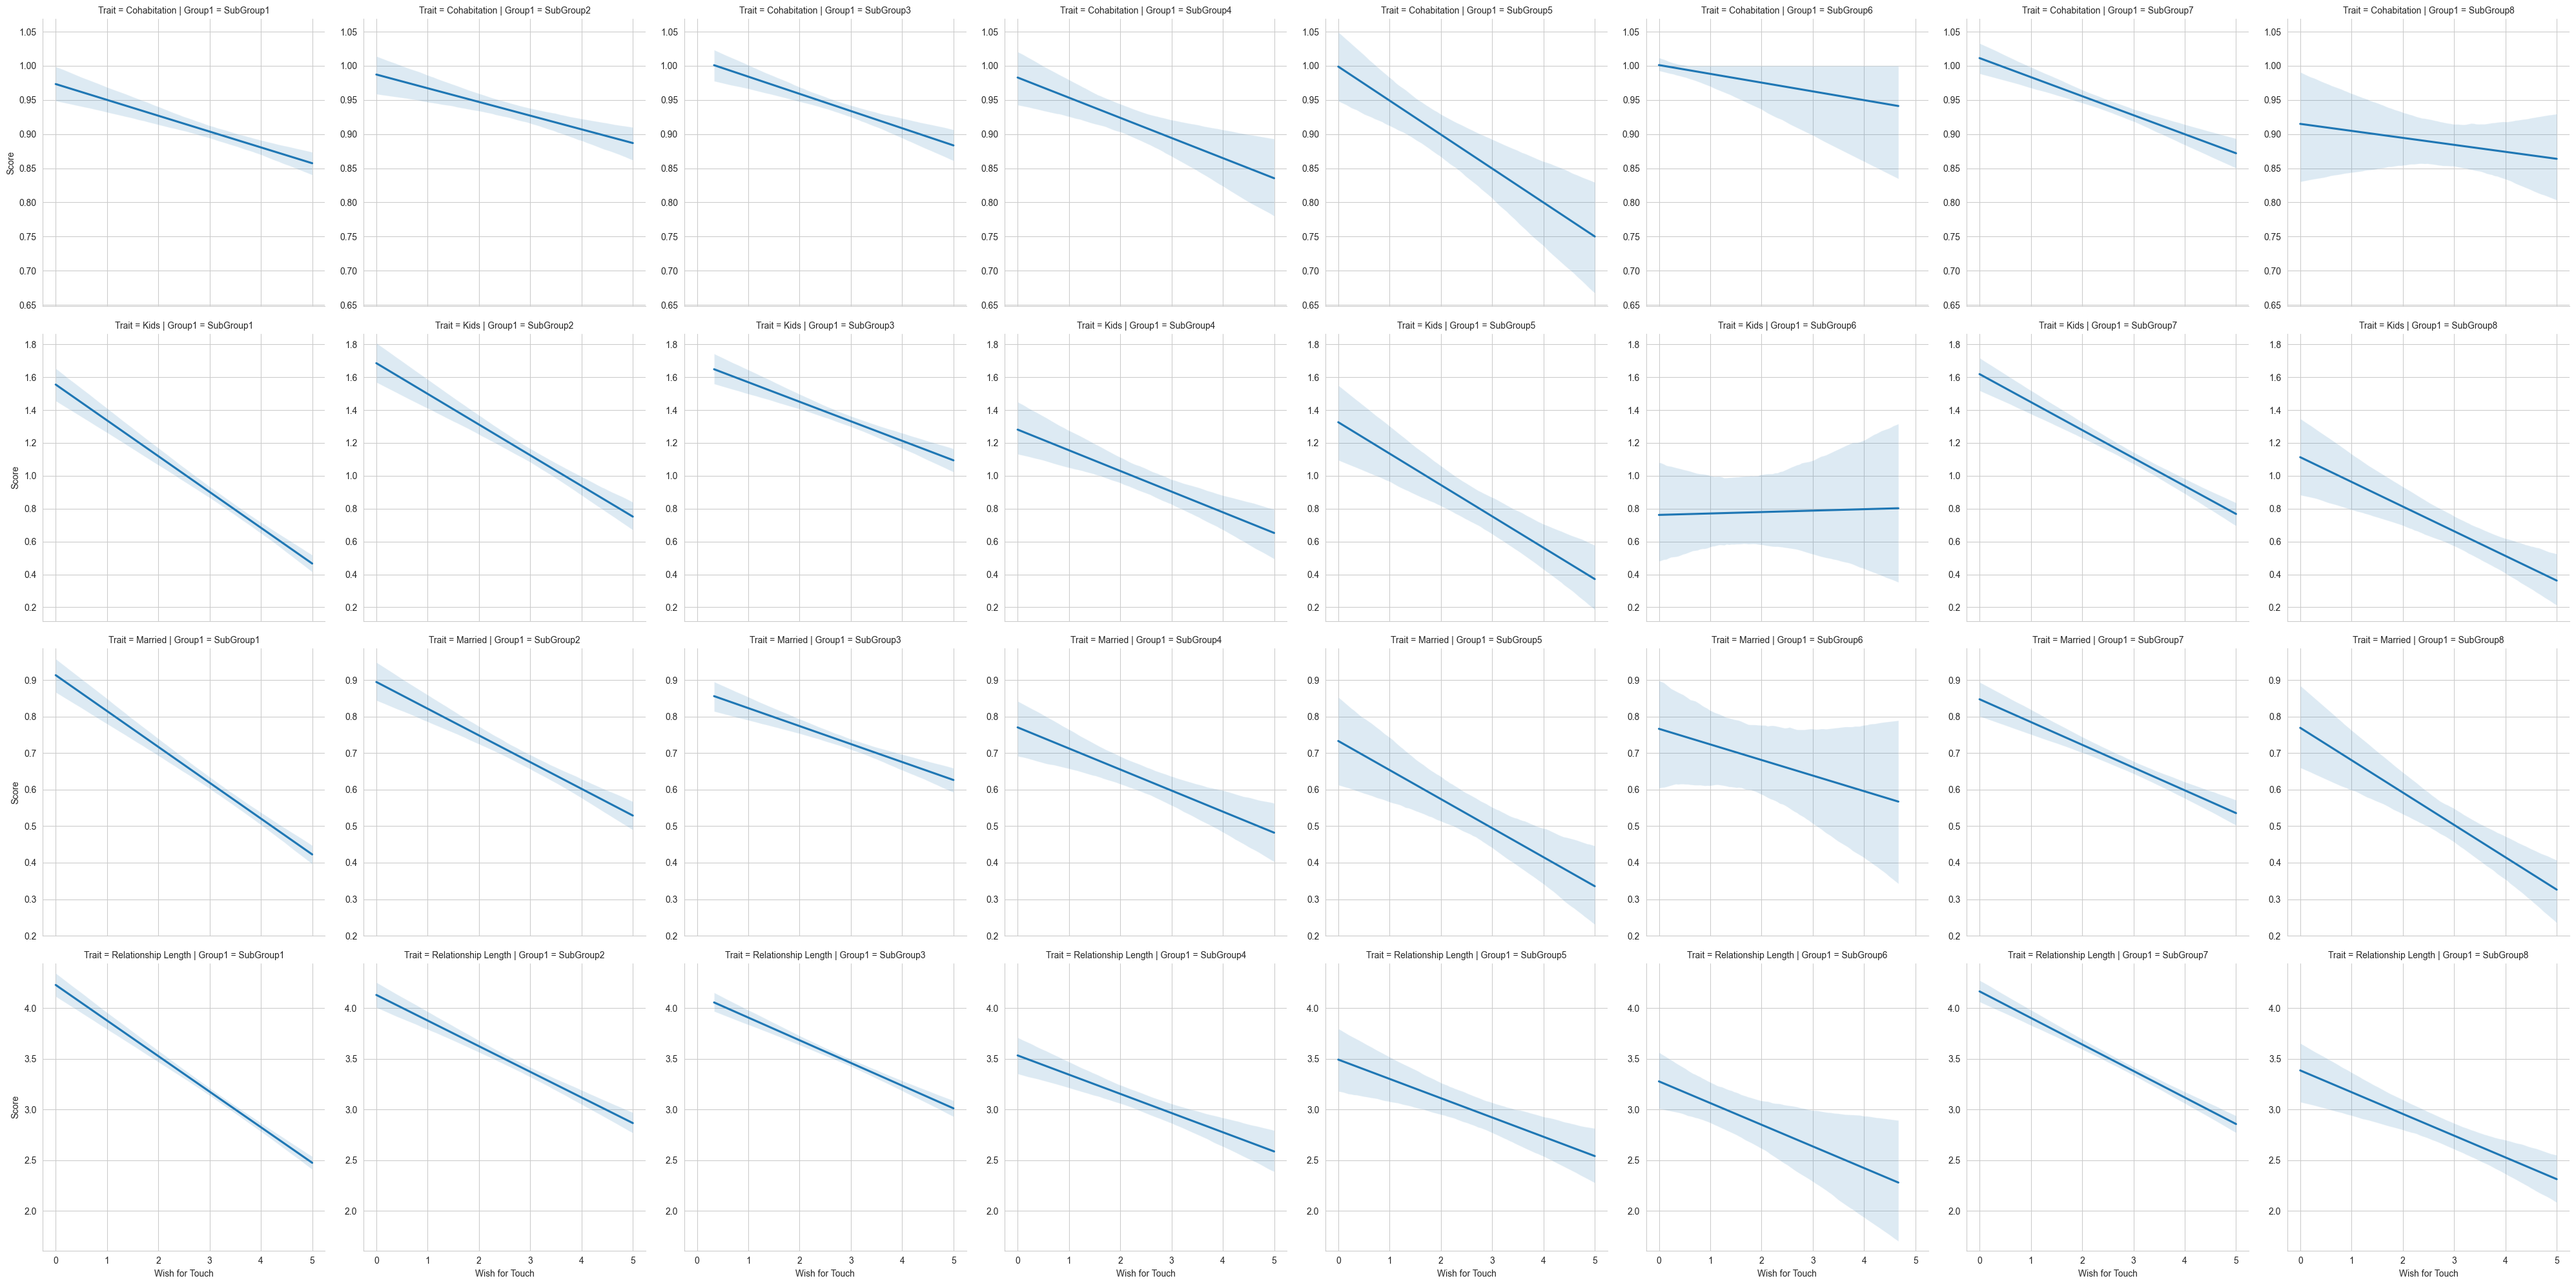

In [165]:
# g = sns.lmplot(
#     data=df_couple, x="Wish for Touch", y="Score",
#     row="Trait", col="Group1",
#     col_order=sorted(df_couple["Group1"].unique()),
#     scatter=False,
#     facet_kws={"sharey": False}
# )
# # Equalize y-limits across columns in each row
# for i, row_axes in enumerate(g.axes):
#     row_min = min(ax.get_ylim()[0] for ax in row_axes if ax is not None)
#     row_max = max(ax.get_ylim()[1] for ax in row_axes if ax is not None)
#     for ax in row_axes:
#         if ax is not None:
#             ax.set_ylim(row_min, row_max)
# plt.savefig("seaborn_plot.png", dpi=600, facecolor="white")